## **Siti Fatimah (10060121097)**

In [ ]:
!git clone https://github.com/username/ProyekDataMining_SitiFatimah.git


Cloning into 'ProyekDataMining_SitiFatimah'...
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
uploaded = files.upload()

Saving health_data.csv to health_data.csv


In [ ]:
df = pd.read_csv("health_data.csv")
df.head()

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0.0,18393.0,1,168.0,62.0,110.0,80.0,0,0,0,0,1,0
1,1,1.0,20228.0,0,156.0,85.0,140.0,90.0,2,0,0,0,1,1
2,2,2.0,18857.0,0,165.0,64.0,130.0,70.0,2,0,0,0,0,1
3,3,3.0,17623.0,1,169.0,82.0,150.0,100.0,0,0,0,0,1,1
4,4,4.0,17474.0,0,156.0,56.0,100.0,60.0,0,0,0,0,0,0


## **EKSPLORASI DATA**

In [ ]:
df["age (yr)"] = (df["age"]/365)

In [ ]:
df["age (yr)"] = round(df["age (yr)"])

In [ ]:
df.head()

,Unnamed: 0,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age (yr)
0,0,0.0,18393.0,1,168.0,62.0,110.0,80.0,0,0,0,0,1,0,50.0
1,1,1.0,20228.0,0,156.0,85.0,140.0,90.0,2,0,0,0,1,1,55.0
2,2,2.0,18857.0,0,165.0,64.0,130.0,70.0,2,0,0,0,0,1,52.0
3,3,3.0,17623.0,1,169.0,82.0,150.0,100.0,0,0,0,0,1,1,48.0
4,4,4.0,17474.0,0,156.0,56.0,100.0,60.0,0,0,0,0,0,0,48.0


In [ ]:
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
df = df.drop('age', axis=1)

<ipython-input-41-21b6769f1f6f>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-41-21b6769f1f6f>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-41-21b6769f1f6f>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-41-21b6769f1f6f>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-41-21b6769f1f6f>:10: UserWarning: set_ticklabels() should only be used wi

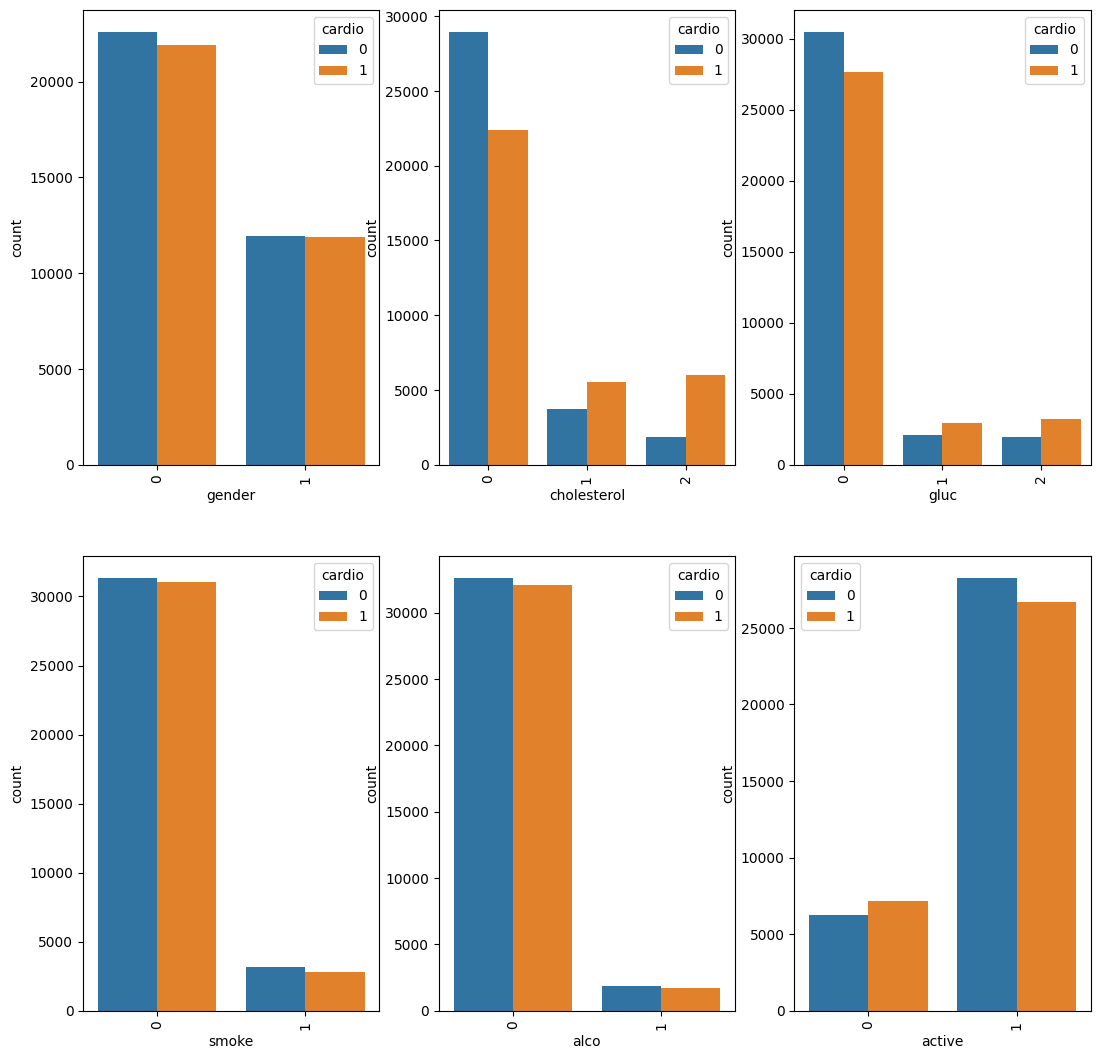

In [ ]:
#Visualisasi variabel kategori
var_kat = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

#6 Grafik (2x3)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(13, 13))
axs = axs.flatten()

for i, var in enumerate(var_kat):
    sns.countplot(x=var, hue='cardio', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

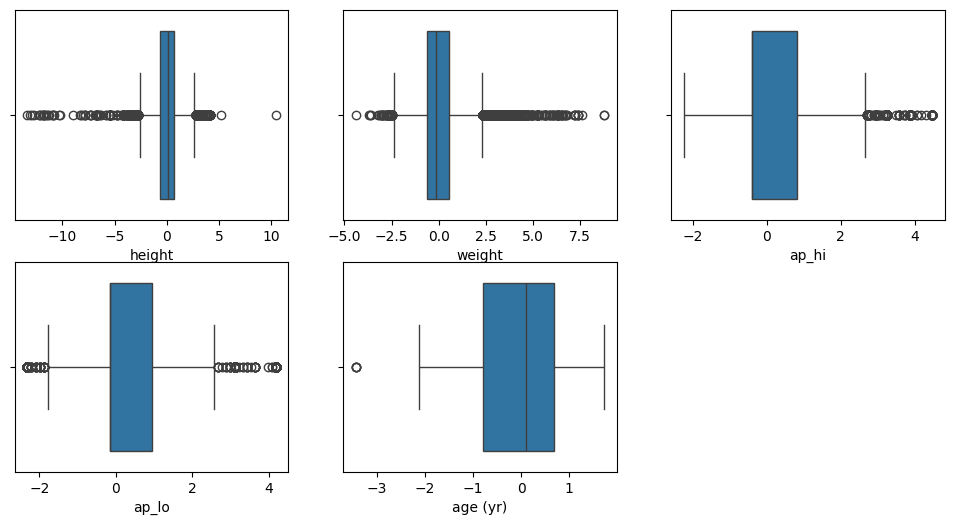

In [ ]:
#Visualisasi variabel numerik
var_num = ['height', 'weight', 'ap_hi',	'ap_lo', 'age (yr)']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
axs = axs.flatten()

for i, var in enumerate(var_num):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.delaxes(axs[5])
plt.show()

In [ ]:
import numpy as np

In [ ]:
print("\nDeskripsi awal ap_hi dan ap_lo:")
print(df[['ap_hi', 'ap_lo']].describe())


Deskripsi awal ap_hi dan ap_lo:
              ap_hi         ap_lo
count  70000.000000  70000.000000
mean     128.817286     96.630414
std      154.011419    188.472530
min     -150.000000    -70.000000
25%      120.000000     80.000000
50%      120.000000     80.000000
75%      140.000000     90.000000
max    16020.000000  11000.000000


In [ ]:
# Menentukan nilai min&max
def check_extreme_values(ap_hi, ap_lo):
    if ap_hi < 90 or ap_hi > 200 or ap_lo < 60 or ap_lo > 120:
        return True
    return False

In [ ]:
# Menyimpan data asli untuk referensi
df_original = df.copy()

In [ ]:
# Menghapus baris dengan nilai ap_hi atau ap_lo yang ekstrim
df = df[~df.apply(lambda row: check_extreme_values(row['ap_hi'], row['ap_lo']), axis=1)]

In [ ]:
# Menangani nilai yang terbalik
df['ap_hi'], df['ap_lo'] = np.where(df['ap_hi'] < df['ap_lo'], (df['ap_lo'], df['ap_hi']), (df['ap_hi'], df['ap_lo']))

# Menampilkan dimensi dataset setelah cleansing
print("\nDimensi dataset setelah cleansing:", df.shape)

# Menampilkan deskripsi data ap_hi dan ap_lo setelah cleansing
print("\nDeskripsi ap_hi dan ap_lo setelah cleansing:")
print(df[['ap_hi', 'ap_lo']].describe())



Dimensi dataset setelah cleansing: (68418, 13)

Deskripsi ap_hi dan ap_lo setelah cleansing:
              ap_hi         ap_lo
count  68418.000000  68418.000000
mean     126.645006     81.322927
std       16.373019      9.219828
min       90.000000     60.000000
25%      120.000000     80.000000
50%      120.000000     80.000000
75%      140.000000     90.000000
max      200.000000    120.000000


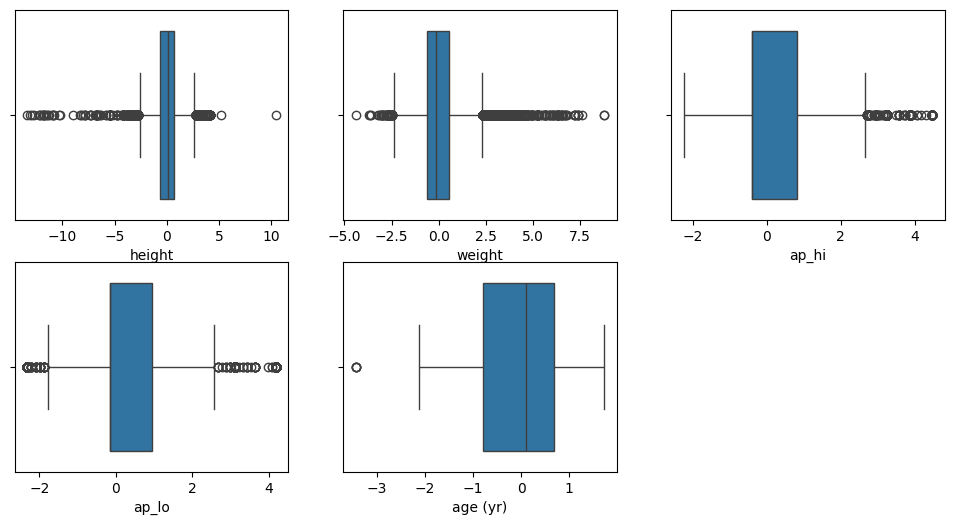

In [ ]:
# Visualisasi variabel numerik
var_num = ['height', 'weight', 'ap_hi', 'ap_lo', 'age (yr)']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
axs = axs.flatten()

for i, var in enumerate(var_num):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.delaxes(axs[5])
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


df[var_num] = scaler.fit_transform(df[var_num])

In [ ]:
scaler = StandardScaler()

In [ ]:
# Standarisasi variabel numerik
df[var_num] = scaler.fit_transform(df[var_num])

In [ ]:
print("Data setelah standarisasi:")
print(df.head())

Data setelah standarisasi:
    id  gender    height    weight     ap_hi     ap_lo  cholesterol  gluc  \
0  0.0       1  0.443881 -0.847599 -1.016619 -0.143488            0     0   
1  1.0       0 -1.022764  0.759808  0.815677  0.941139            2     0   
2  2.0       0  0.077220 -0.707824  0.204911 -1.228115            2     0   
3  3.0       1  0.566101  0.550146  1.426442  2.025765            0     0   
4  4.0       0 -1.022764 -1.266923 -1.627385 -2.312742            0     0   

   smoke  alco  active  cardio  age (yr)  
0      0     0       1       0 -0.492047  
1      0     0       1       1  0.246856  
2      0     0       0       1 -0.196486  
3      0     0       1       1 -0.787608  
4      0     0       0       0 -0.787608  


In [ ]:
df1 = pd.get_dummies(data=df, columns=['cholesterol', 'gluc'])
df1.head()

,id,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,age (yr),cholesterol_0,cholesterol_1,cholesterol_2,gluc_0,gluc_1,gluc_2
0,0.0,1,0.443881,-0.847599,-1.016619,-0.143488,0,0,1,0,-0.492047,True,False,False,True,False,False
1,1.0,0,-1.022764,0.759808,0.815677,0.941139,0,0,1,1,0.246856,False,False,True,True,False,False
2,2.0,0,0.077220,-0.707824,0.204911,-1.228115,0,0,0,1,-0.196486,False,False,True,True,False,False
3,3.0,1,0.566101,0.550146,1.426442,2.025765,0,0,1,1,-0.787608,True,False,False,True,False,False
4,4.0,0,-1.022764,-1.266923,-1.627385,-2.312742,0,0,0,0,-0.787608,True,False,False,True,False,False


In [ ]:
df1 = df1.drop('id', axis = 'columns')

## **ANALISIS DATA METODE BOOSTING**

In [ ]:
# Membagi membagi dataset menjadi data pelatihan dan data pengujian

X = df1.drop('cardio',axis='columns')
y = df1['cardio']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# LANGKAH 1: Inisialisasi model Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# LANGKAH 2: Melatih model pada data training
gb_model.fit(X_train, y_train)

# LANGKAH 3: Melakukan prediksi pada data testing
y_pred = gb_model.predict(X_test)

# LANGKAH 4: Evaluasi model
# Menghitung akurasi
akurasi = accuracy_score(y_test, y_pred)
print(f"Akurasi Model Gradient Boosting: {akurasi:.4f}")

Akurasi Model Gradient Boosting: 0.7423


**INTERPRETASI:**

Akurasi model Gradient Boosting sebesar 0.7423 menunjukkan bahwa model mampu membuat prediksi yang benar sebesar 74,23% dari seluruh data uji (test set) yang digunakan.


Confusion Matrix:
[[5455 1483]
 [2043 4703]]


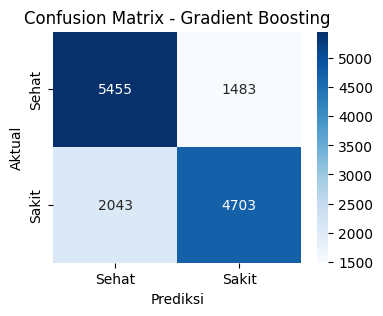

In [ ]:
# Menampilkan Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualisasi Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Sehat', 'Sakit'], yticklabels=['Sehat', 'Sakit'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()


**INTERPRETASI:**

Confusion Matrix pada plot menunjukkan hasil klasifikasi penyakit jantung menggunakan model Gradient Boosting, dengan fitur-fitur seperti usia, jenis kelamin, tekanan darah, kolesterol, kebiasaan merokok, konsumsi alkohol, dan aktivitas fisik yang digunakan untuk memprediksi risiko penyakit jantung (variabel target: cardio).

Pada Confusion Matrix ini:

1. True Negative (TN): Sebanyak 5455 individu sehat diprediksi dengan benar sebagai "Sehat". Ini menunjukkan akurasi yang baik dalam mengenali individu tanpa penyakit jantung.

2. False Positive (FP): Sebanyak 1483 individu sehat diprediksi salah sebagai "Sakit". Kesalahan ini dapat memicu kekhawatiran yang tidak perlu, namun lebih baik daripada tidak mendeteksi penyakit sama sekali.

3. False Negative (FN): Sebanyak 2043 individu sakit diprediksi salah sebagai "Sehat". Kesalahan ini cukup signifikan, karena individu berisiko penyakit jantung tidak terdeteksi, yang dapat membahayakan jika tidak segera ditindaklanjuti.

4. True Positive (TP): Sebanyak 4703 individu sakit diprediksi dengan benar sebagai "Sakit", yang menunjukkan kemampuan model untuk mendeteksi penyakit jantung dengan cukup baik.

In [ ]:
# Menampilkan Classification Report
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))


Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76      6938
           1       0.76      0.70      0.73      6746

    accuracy                           0.74     13684
   macro avg       0.74      0.74      0.74     13684
weighted avg       0.74      0.74      0.74     13684



**INTERPRETASI:**

Model Gradient Boosting memiliki akurasi 74% dengan performa yang cukup baik dalam mendeteksi kedua kelas (sehat dan sakit). Namun, model ini cenderung lebih akurat dalam memprediksi individu "Sehat" dibandingkan individu "Sakit", yang terlihat dari nilai recall kelas "Sakit" yang lebih rendah (70%). Untuk masalah penyakit jantung, recall pada kelas "Sakit" menjadi lebih penting karena kesalahan (false negative) bisa berdampak serius. Oleh karena itu, model masih dapat ditingkatkan, misalnya dengan mengoptimalkan threshold atau menggunakan teknik balancing data.

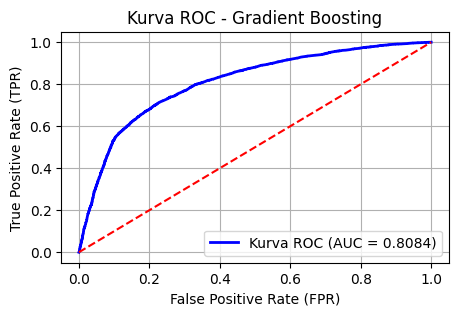

In [ ]:
# LANGKAH 5: ROC Curve dan AUC
# Menghitung probabilitas kelas positif (1)
y_proba = gb_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Visualisasi ROC Curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Kurva ROC (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Kurva ROC - Gradient Boosting')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


**INTERPRETASI:**

Gambar yang Anda unggah menunjukkan Kurva ROC (Receiver Operating Characteristic) dari model Gradient Boosting. Kurva ini digunakan untuk mengevaluasi kinerja model klasifikasi, khususnya dalam memisahkan antara dua kelas, dalam hal ini kemungkinan penyakit jantung (cardio).

1. Sumbu X (False Positive Rate/FPR) menunjukkan proporsi data negatif yang salah diklasifikasikan sebagai positif. Semakin kecil FPR, semakin baik model dalam menghindari kesalahan prediksi terhadap kelas negatif.

2. Sumbu Y (True Positive Rate/TPR) menunjukkan proporsi data positif yang benar diklasifikasikan sebagai positif (juga dikenal sebagai sensitivitas atau recall). Semakin tinggi TPR, semakin baik model dalam mengidentifikasi data positif.

3. Garis merah putus-putus menunjukkan garis acuan yang menunjukkan kinerja model acak. Jika model hanya menghasilkan prediksi acak, kurva ROC akan mengikuti garis ini.

4. Kurva biru menunjukkan kinerja model Gradient Boosting, yang seharusnya berada di atas garis acuan, menandakan bahwa model ini dapat memisahkan kelas positif dan negatif dengan lebih baik daripada model acak.

5. AUC (Area Under the Curve) = 0.8084 adalah skor yang mengukur luas di bawah kurva ROC. Nilai AUC yang lebih tinggi (antara 0 dan 1) menunjukkan bahwa model tersebut memiliki kemampuan yang lebih baik untuk membedakan antara dua kelas. AUC sebesar 0.8084 menunjukkan bahwa model ini cukup baik dalam memprediksi penyakit jantung, dengan kemampuan untuk memisahkan kelas positif dan negatif lebih dari 80%.

Secara keseluruhan, model ini menunjukkan kinerja yang cukup baik dengan AUC yang mendekati 0.8, menunjukkan kemampuan model untuk membedakan antara individu yang menderita penyakit jantung dan yang tidak.

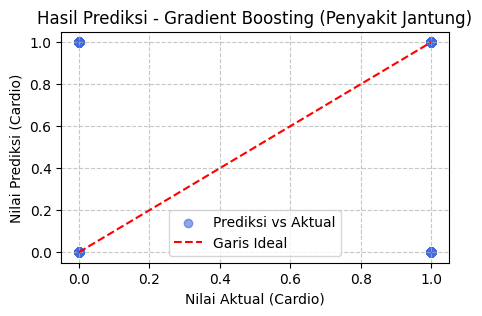

In [ ]:
# Scatter plot of predictions vs actual values for 'cardio'
plt.figure(figsize=(5, 3))
plt.scatter(y_test, y_pred, color='royalblue', alpha=0.6, label='Prediksi vs Aktual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--", color="red", label="Garis Ideal")
plt.xlabel("Nilai Aktual (Cardio)")
plt.ylabel("Nilai Prediksi (Cardio)")
plt.title("Hasil Prediksi - Gradient Boosting (Penyakit Jantung)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


**INTERPRETASI:**

Plot di atas menunjukkan hasil prediksi metode Gradient Boosting untuk klasifikasi penyakit jantung dengan performa yang sangat baik. Titik-titik biru yang merepresentasikan hubungan antara nilai prediksi dan nilai aktual berada tepat pada garis merah putus-putus sebagai garis ideal (y = x). Hal ini menandakan bahwa model mampu memprediksi nilai 0 (negatif) dan 1 (positif) secara sempurna tanpa kesalahan. Akurasi prediksi yang tinggi ini menunjukkan kemampuan model Gradient Boosting dalam menangkap pola dari data yang digunakan. Namun, evaluasi lebih lanjut seperti validasi silang atau pengujian dengan data terpisah perlu dilakukan untuk memastikan tidak ada overfitting pada model.